# Lecture 1 Workbook
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm
import pandas as pd
import geopandas as gpd

course_data = 'https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/'

## Load data
Load data on cerebellar volumes

In [4]:
cerebellar_volumes_df = pd.read_csv(os.path.join(course_data, 'cerebellar_volumes.csv'))
# print(TCV_Corr.reshape((6, 10))) # Show it so we can copy it into the power point

In [5]:
TCV_Corr = cerebellar_volumes_df.TCV_Corr
print(TCV_Corr.values[0:60].reshape(10,6))

[[0.13063346 0.13043501 0.12463649 0.13271747 0.13413195 0.12593066]
 [0.13928696 0.10248984 0.12468902 0.13392287 0.11105972 0.14522466]
 [0.14305619 0.13740272 0.11159415 0.13741525 0.1436536  0.14273143]
 [0.13262785 0.14441813 0.11724154 0.10111387 0.10806189 0.11613042]
 [0.14547072 0.14138071 0.12713012 0.13719662 0.13673853 0.1242479 ]
 [0.1295035  0.14990315 0.139686   0.12573719 0.13295254 0.13464835]
 [0.14219809 0.13057277 0.12526684 0.14669959 0.1174563  0.12803674]
 [0.11059727 0.10112159 0.136587   0.1208294  0.15362082 0.13315475]
 [0.12909824 0.12937282 0.11317588 0.14067035 0.14232815 0.11761201]
 [0.14346951 0.12589456 0.13981605 0.10785161 0.11954062 0.13801979]]


# Understanding measurement
Load and plot the HDI data

In [6]:
hdi = pd.read_csv('https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/hdi.dat', sep='\s+')
hdi.head()

,rank,state,hdi,canada.dist
0,1,Connecticut,0.962,2
1,2,Massachusetts,0.961,2
2,3,New Jersey,0.961,2
3,4,"Washington, D.C.",0.960,4
4,5,Maryland,0.960,3


In [7]:
votes = pd.read_csv("https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/StateVoteAndIncome68_00.csv")
votes.head()

,Unnamed: 0,st_fips,st_year,st_state,st_stateabb,st_total,st_dem,st_rep,st_repshare,st_demshare,st_income,st_inc10k
0,0,1,1968,Alabama,AL,1050,197,147,0.427326,0.572674,11662.756836,1.166276
1,1,2,1968,Alaska,AK,83,35,38,0.520548,0.479452,20388.449219,2.038845
2,2,4,1968,Arizona,AZ,487,171,267,0.609589,0.390411,14864.884766,1.486488
3,3,5,1968,Arkansas,AR,610,185,189,0.505348,0.494652,11124.081055,1.112408
4,4,6,1968,California,CA,7252,3244,3468,0.516687,0.483313,19362.400391,1.936240


## Plot HDI against income

In [8]:
votes2000 = votes[votes["st_year"]==2000]
merged_df = pd.merge(votes2000, hdi, left_on='st_state', right_on='state')
merged_df.head()

,Unnamed: 0,st_fips,st_year,st_state,st_stateabb,st_total,st_dem,st_rep,st_repshare,st_demshare,st_income,st_inc10k,rank,state,hdi,canada.dist
0,400,1,2000,Alabama,AL,1666,693,941,0.575887,0.424113,21656.208984,2.165621,47,Alabama,0.809,5
1,401,2,2000,Alaska,AK,286,79,167,0.678862,0.321138,27209.667969,2.720967,17,Alaska,0.955,1
2,402,4,2000,Arizona,AZ,1532,685,782,0.533061,0.466939,23381.015625,2.338102,25,Arizona,0.939,3
3,403,5,2000,Arkansas,AR,922,423,473,0.527902,0.472098,19977.871094,1.997787,48,Arkansas,0.803,4
4,404,6,2000,California,CA,10966,5861,4567,0.437955,0.562045,29581.390625,2.958139,11,California,0.958,3


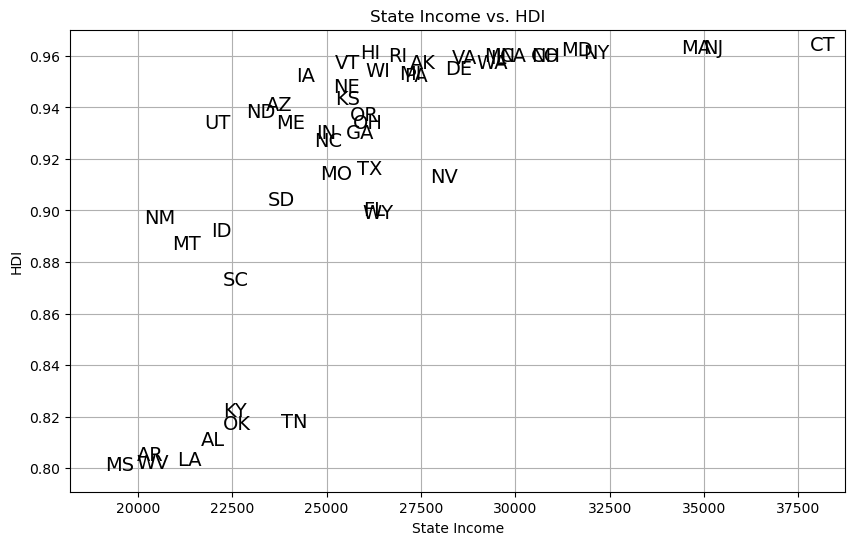

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['st_income'], merged_df['hdi'], marker='', color='blue')

# Adding state abbreviations as labels
for i, txt in enumerate(merged_df['st_stateabb']):
    plt.annotate(txt, (merged_df['st_income'].iloc[i], merged_df['hdi'].iloc[i]), fontsize= 14)

# Labels and title
plt.xlabel('State Income')
plt.ylabel('HDI')
plt.title('State Income vs. HDI')

# Show plot
plt.grid(True)

Text(0.5, 1.0, 'State Income Rank vs. HDI Rank')

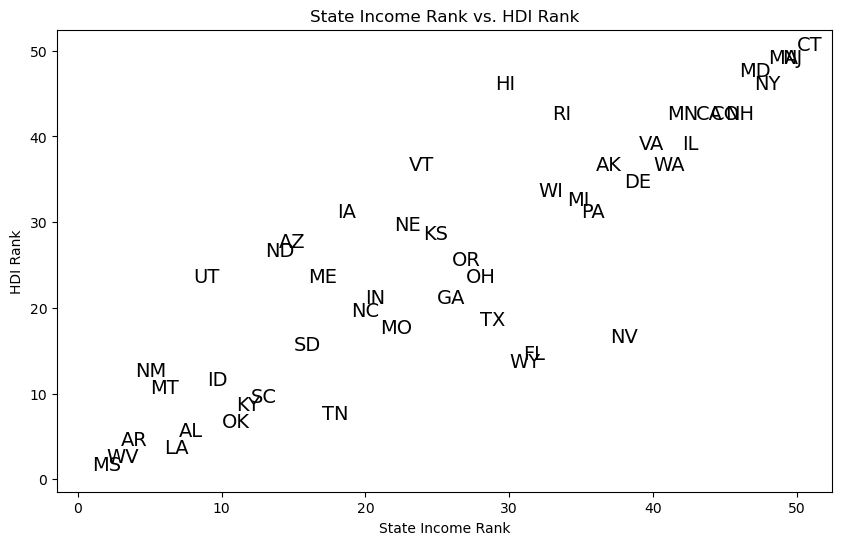

In [10]:
merged_df['income_rank'] = merged_df['st_income'].rank()
merged_df['hdi_rank'] = merged_df['hdi'].rank()

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['income_rank'], merged_df['hdi_rank'], marker='', color='blue')

# Adding state abbreviations as labels
for i, txt in enumerate(merged_df['st_stateabb']):
    plt.annotate(txt, (merged_df['income_rank'].iloc[i], merged_df['hdi_rank'].iloc[i]), fontsize=14)

# Labels and title
plt.xlabel('State Income Rank')
plt.ylabel('HDI Rank')
plt.title('State Income Rank vs. HDI Rank')

In [11]:
us_states = gpd.read_file('cb_2018_us_state_500k\\cb_2018_us_state_500k.shp')
us_states = us_states[us_states['NAME'] != 'Alaska']
us_states = us_states[us_states['NAME'] != 'Hawaii']

us_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


(-127.65372665000001, -64.05923634999999, 23.2800329, 50.6274211)

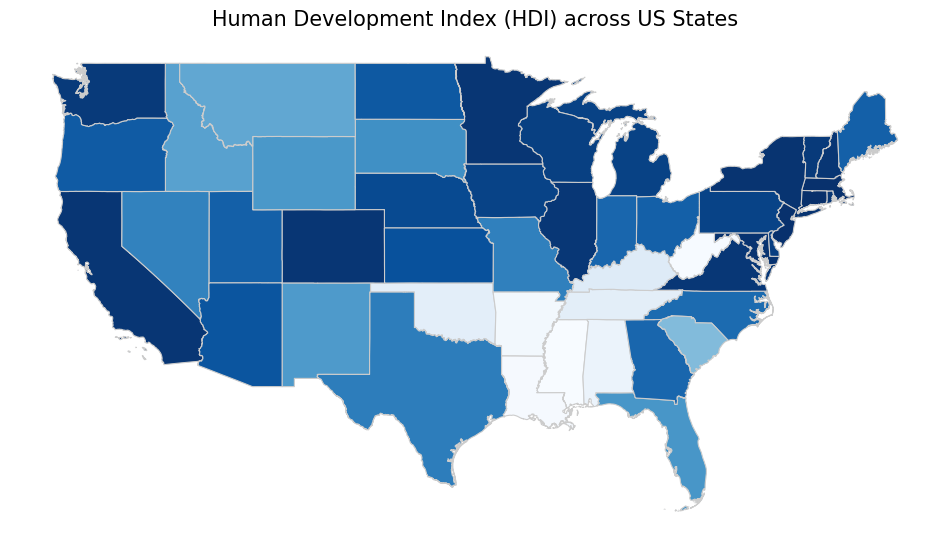

In [12]:
# Merge the shapefile with the HDI data
merged_data = us_states.merge(hdi, how='inner', left_on='NAME', right_on='state')
merged_data.drop

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='hdi', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Set plot title
ax.set_title('Human Development Index (HDI) across US States', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Remove axis
ax.axis('off')

## Create a distribution
Now we'll make an actual distribution out of this large number of
cerebella so we can emphasize the difference between a population and a sample.

A population has an infinite number of possible members


In [13]:
# Generate a gamma distribution with the appropriate parameters
cblmGammaShape, cblmGammaLoc, cblmGammaScale = gamma.fit(TCV_Corr)
exaggerateWidth = 1 # Increase width by a factor of 10
clmbGammaShape = cblmGammaShape / exaggerateWidth
cblmGammaScale = cblmGammaScale * exaggerateWidth
# Now we'll randomly sample 60 cerebella out of the population as our sample
NumCblm = 60
CblmSample = gamma.rvs(cblmGammaShape, loc=cblmGammaLoc, scale=cblmGammaScale, size=NumCblm)


In [14]:
print(CblmSample.reshape((10, 6)))


[[0.11039736 0.1489458  0.11910433 0.1414971  0.15745619 0.15197575]
 [0.1435899  0.12186114 0.12544909 0.14100678 0.137326   0.14629711]
 [0.1297068  0.10813297 0.13700269 0.1272003  0.1044006  0.13102211]
 [0.11338838 0.13332225 0.132767   0.14412079 0.13677316 0.13288602]
 [0.11873454 0.11121249 0.15646581 0.14087858 0.13074581 0.12761067]
 [0.14001453 0.14871699 0.10972126 0.14595742 0.13189816 0.1476874 ]
 [0.13560185 0.1180284  0.12647572 0.13368948 0.13347963 0.10455905]
 [0.13647907 0.14786821 0.12089687 0.15309299 0.12553991 0.11445433]
 [0.13323094 0.11569287 0.11836517 0.14221369 0.12160758 0.11141983]
 [0.1475204  0.12025806 0.12899644 0.10659313 0.10810025 0.13197085]]


Text(0.5, 1.0, 'Measured volumes of cerebella')

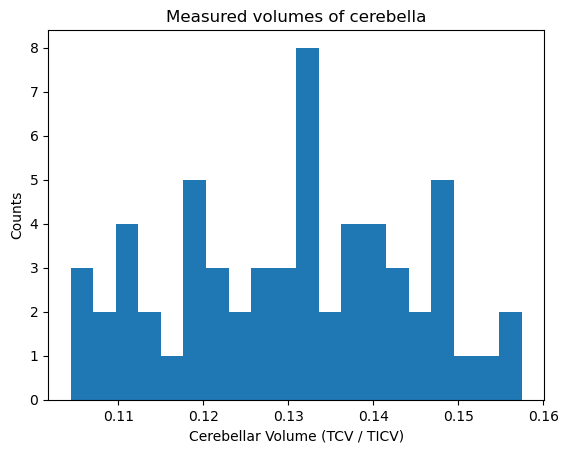

In [15]:
plt.figure()
plt.hist(CblmSample, bins=20)
plt.xlabel('Cerebellar Volume (TCV / TICV)')
plt.ylabel('Counts')
plt.title('Measured volumes of cerebella')

Make a plot of the pdf of characteristics from a single cerebellum


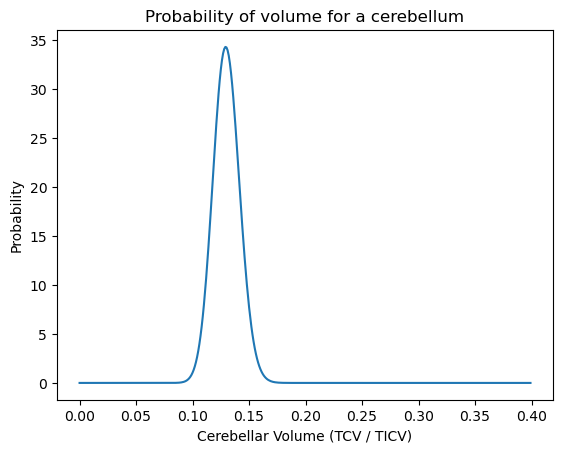

In [16]:
Vol = np.arange(0, 0.4, 0.001)

# Generate a plot of the gamma distribution
plt.plot(Vol, gamma.pdf(Vol, cblmGammaShape, loc=cblmGammaLoc, scale=cblmGammaScale))
plt.xlabel('Cerebellar Volume (TCV / TICV)')
plt.ylabel('Probability')
plt.title('Probability of volume for a cerebellum')

plt.show()

## Plot histogram

Text(0.5, 1.0, 'Continuous data')

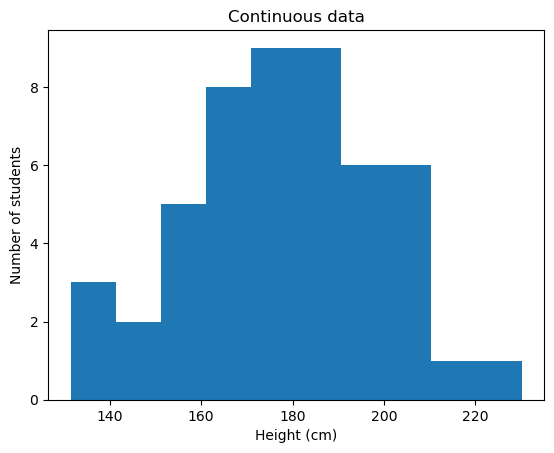

In [17]:
plt.figure()
heights = np.random.normal(180, 20, 50)
plt.hist(heights, bins=10)
plt.xlabel('Height (cm)')
plt.ylabel('Number of students')
plt.title('Continuous data')

## Plot bar chart

Text(0.5, 1.0, '2003 Elections')

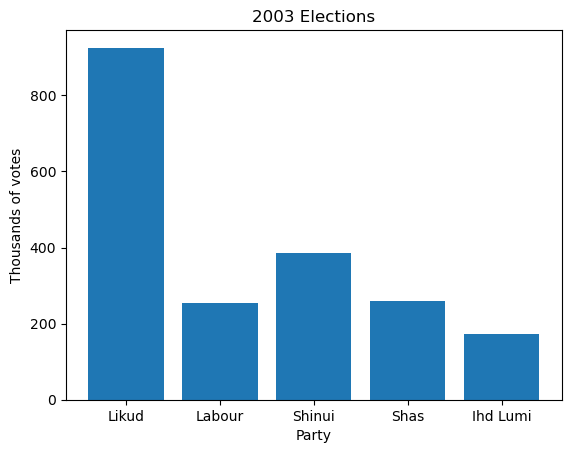

In [18]:
Parties = ['Likud', 'Labour', 'Shinui', 'Shas', 'Ihd Lumi', 'Meretz', 'NRP',
           'Yahadut Hatorah', 'Hazit', 'Am Ehad', 'Brit', 'Israel Baliyah', 'Raam', 'Others']
Votes = np.array([925279, 255183, 386535, 258879, 173973, 164122, 132370, 135087,
         93819, 86808, 71299, 67719, 65551, 128740])
plt.figure()
plt.bar(range(5), Votes[:5] / 1000)
plt.xticks(range(5), Parties[:5])
plt.xlabel('Party')
plt.ylabel('Thousands of votes')
plt.title('2003 Elections')

## Make normal approximation

Text(0.5, 1.0, 'Probability of volume for a cerebellum')

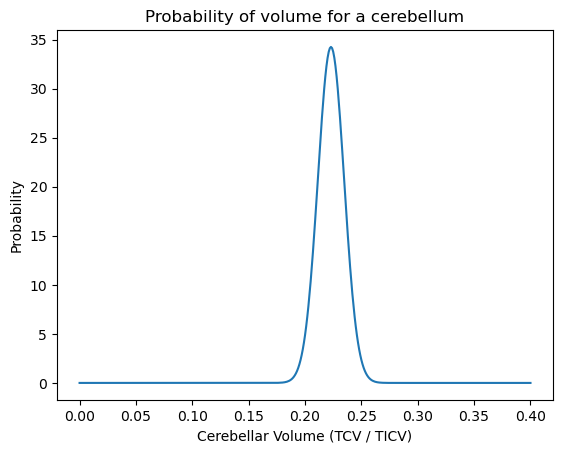

In [19]:
Vol = np.arange(0, 0.401, 0.001)

# Calculate gamma distribution mean and variance
gamMean = cblmGammaShape * cblmGammaScale
gamVar = cblmGammaShape * cblmGammaScale**2

# Plot gamma distribution
fig, ax = plt.subplots()
ax.plot(Vol, norm.pdf(Vol, gamMean, np.sqrt(gamVar)))
ax.set_xlabel('Cerebellar Volume (TCV / TICV)')
ax.set_ylabel('Probability')
ax.set_title('Probability of volume for a cerebellum')


## Make two population models

In [20]:
Vol = np.arange(0.05, 0.201, 0.001)

### For gender

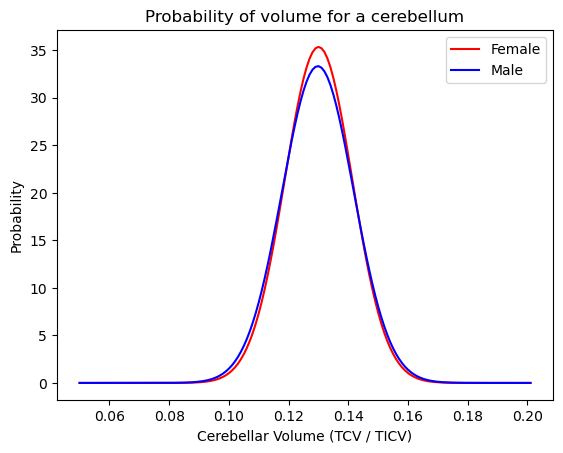

In [21]:
gender = cerebellar_volumes_df["Gender"]
female = gender == 'F'
male = gender == 'M'
femaleMean, femaleSD = norm.fit(TCV_Corr[female])
maleMean, maleSD = norm.fit(TCV_Corr[male])

plt.figure()
plt.plot(Vol, norm.pdf(Vol, femaleMean, femaleSD), 'r-')
plt.plot(Vol, norm.pdf(Vol, maleMean, maleSD), 'b-')
plt.xlabel('Cerebellar Volume (TCV / TICV)')
plt.ylabel('Probability')
plt.title('Probability of volume for a cerebellum')
plt.legend(['Female', 'Male'])

### For age

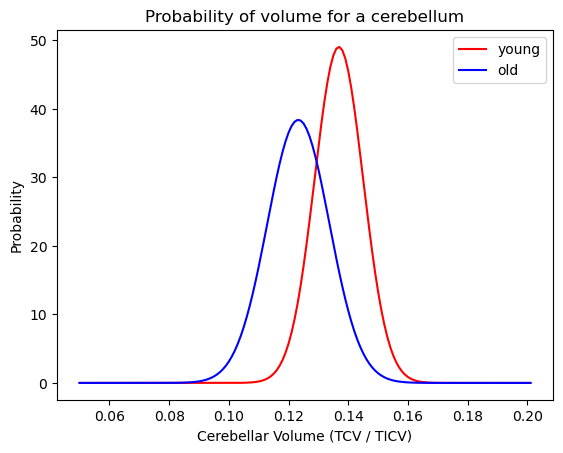

In [22]:
age = cerebellar_volumes_df["Age"]
young = age <= 40
old = age > 40
youngMean, youngSD = norm.fit(TCV_Corr[young])
oldMean, oldSD = norm.fit(TCV_Corr[old])

plt.figure()
plt.plot(Vol, norm.pdf(Vol, youngMean, youngSD), 'r-')
plt.plot(Vol, norm.pdf(Vol, oldMean, oldSD), 'b-')
plt.xlabel('Cerebellar Volume (TCV / TICV)')
plt.ylabel('Probability')
plt.title('Probability of volume for a cerebellum')
plt.legend(['young', 'old'])

In [23]:
!pip install -q watermark

In [24]:
%load_ext watermark
%watermark -v -iv -w

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

pandas    : 2.0.3
geopandas : 0.14.4
seaborn   : 0.13.1
numpy     : 1.25.2
matplotlib: 3.7.1

Watermark: 2.4.3

